# Team Members
- 22127148 - Dương Nhật Huy
- 22127224 - Trương Thuận Kiệt
- 22127257 - Phạm Minh Mẫn

# Table of contents
1. [Libraries](#libraries)
2. [Overview of dataset](#overview-of-dataset)
3. [Preprocessing data](#preprocessing)
4. [Questions](#questions)
    - [Question 1](#question-1)
    - [Question 2](#question-2)
    - [Question 3](#question-3)
5. [Conclusion](#conclusion)
    - [Difficulties during the project](#difficulties)
    - [Useful things learned](#useful)
    - [Plans to improve if have more time](#plans)
6. [References](#references)


<div id = "libraries">
<h2>1. Libraries</h2>
<p>Import necessary libraries to use</p> 
</div>

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer


<div id="overview-of-dataset"> <h2>2. Overview of dataset</h2> </div>
Provide an overview of the dataset.

In [199]:
data = pd.read_csv('./Data/healthcare-dataset-stroke-data.csv')

In [200]:
data.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h3> Number of rows and cols </h3>

In [201]:
print("Number of rows: ", len(data))

Number of rows:  5110


In [202]:
print("Number of columns: ", len(data.columns))

Number of columns:  12


<h3> Meaning of each row </h3>

Each row will represent each patient's medical record of stroke with some features relating to that patient.

After looking into the entire data of file csv, it can be seen there are no abnormal rows.

<h3> Duplicated rows </h3>

In [203]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


So can be seen that there is no duplicates

<h3> Meaning of each column </h3>

In [204]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Here is the description of each column:
    - **id**: id of each patient
    - **gender**: each patient's gender can be male, female and other
    - **age**: how old is each patient
    - **hypertension**: when the pressure in blood is too high
    - **heart_disease**:  when the patient have disease relates to heart
    - **ever_married**: whether the patient is or used to be married
    - **work_type**: the job status of the patient
    - **Residence_type**: the area that patients live
    - **avg_glucose_level**: the level of sugar in the blood
    - **bmi**: measure of body fat based on height and weight
    - **smoking_status**: whether the patient is smoking or not
    - **stroke**: whether the patient got stroke or not

- Unique values and value range of each column

In [205]:
# Unique values in each column
print("Unique values of gender: ", data['gender'].unique())
print("Unique values of hypertension: ", data['hypertension'].unique())
print("Unique values of heart_disease: ", data['heart_disease'].unique())
print("Unique values of ever_married: ", data['ever_married'].unique())
print("Unique values of work_type: ", data['work_type'].unique())
print("Unique values of Residence_type: ", data['Residence_type'].unique())
print("Unique values of smoking_status: ", data['smoking_status'].unique())
print("Unique values of stroke: ", data['stroke'].unique())

Unique values of gender:  ['Male' 'Female' 'Other']
Unique values of hypertension:  [0 1]
Unique values of heart_disease:  [1 0]
Unique values of ever_married:  ['Yes' 'No']
Unique values of work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values of Residence_type:  ['Urban' 'Rural']
Unique values of smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Unique values of stroke:  [1 0]


- So we can see unique values of each column:
    - **gender**: Male, Female, Other
    - **heart_disease**: 0: No, 1: Yes
    - **ever_married**: Yes, No
    - **work_type**: Private, Self-employed, Govt_job, children, Never_worked
    - **Residence_type**: Urban, Rural
    - **smoking_status**: formerly smoked, never smoked, smokes, Unknown
    - **stroke**: 1: Yes, 0: No

In [206]:
# Range values of age, avg_glucose_level, bmi
print("Range of age: ", data['age'].min(), " - ", data['age'].max())
print("Range of avg_glucose_level: ", data['avg_glucose_level'].min(), " - ", data['avg_glucose_level'].max())
print("Range of bmi: ", data['bmi'].min(), " - ", data['bmi'].max())

Range of age:  0.08  -  82.0
Range of avg_glucose_level:  55.12  -  271.74
Range of bmi:  10.3  -  97.6


- Range values:
    - **age**: 0.08-82.0
    - **avg_glucose_level**: 55.12 - 271.74
    - **bmi**: 10.3 - 97.6

=> As we see, age value got float values and needs to be corrected to integer in Data Processing

<h3>Current data type of each column</h3>

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Look like all data type of each column is correct, except from age type is currently float

In [208]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<h3>Numerical columns exploration</h3>

<h4> Age column </h4>

- Distribution of values

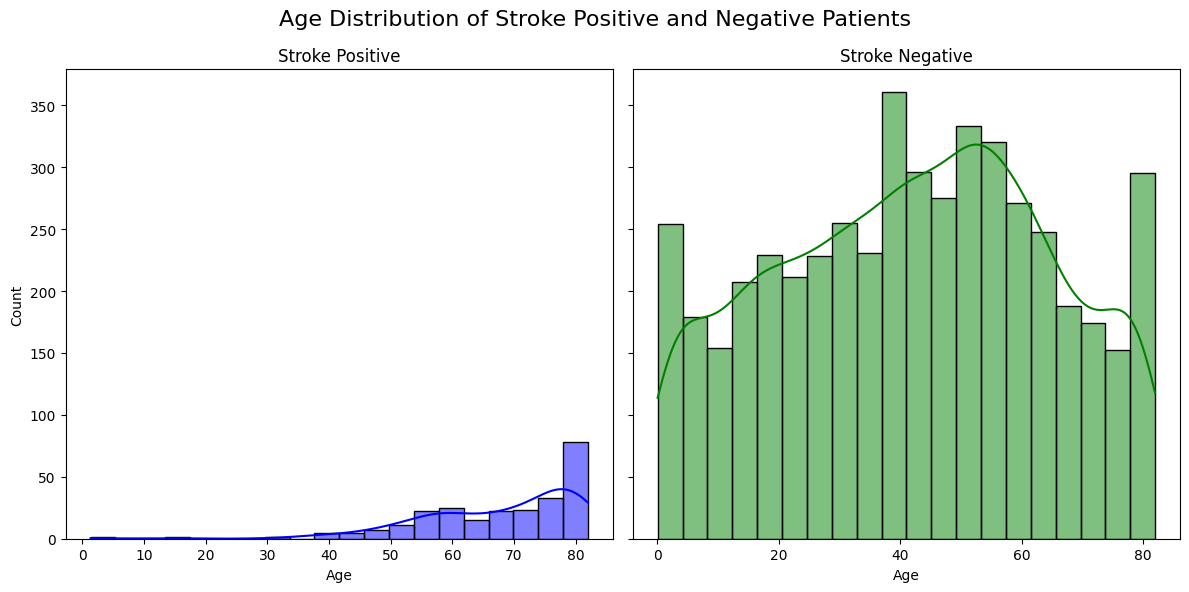

In [209]:
# With each numerical column, how are values distributed?
# Age
# Analysis of Stroke positive and negative patients
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting Age Distribution for Stroke Positive patients
sns.histplot(stroke_positive['age'], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel('Age')

# Plotting Age Distribution for Stroke Negative patients
sns.histplot(stroke_negative['age'], bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel('Age')

# Set the main title
plt.suptitle("Age Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

- Percentage of missing values

In [210]:
print("Percentage of missing values in age: ", (data['age'].isnull().sum() / len(data)) * 100)

Percentage of missing values in age:  0.0


- Min/Max

In [211]:
print("Min/Max age of stroke positive patients: ", stroke_positive['age'].min(), stroke_positive['age'].max())

Min/Max age of stroke positive patients:  1.32 82.0


&rarr; **Age as a Risk Factor**: The data clearly indicates that the incidence of strokes rises significantly with age, especially after 50 years, aligning with known medical research that strokes are more common in older populations.

&rarr; **Skewed Distribution for Positive Cases**: The left graph's distribution highlights that strokes are quite rare in younger patients but become more prevalent after middle age.


<h4>Hypertension Column</h4>

- Distribution of values

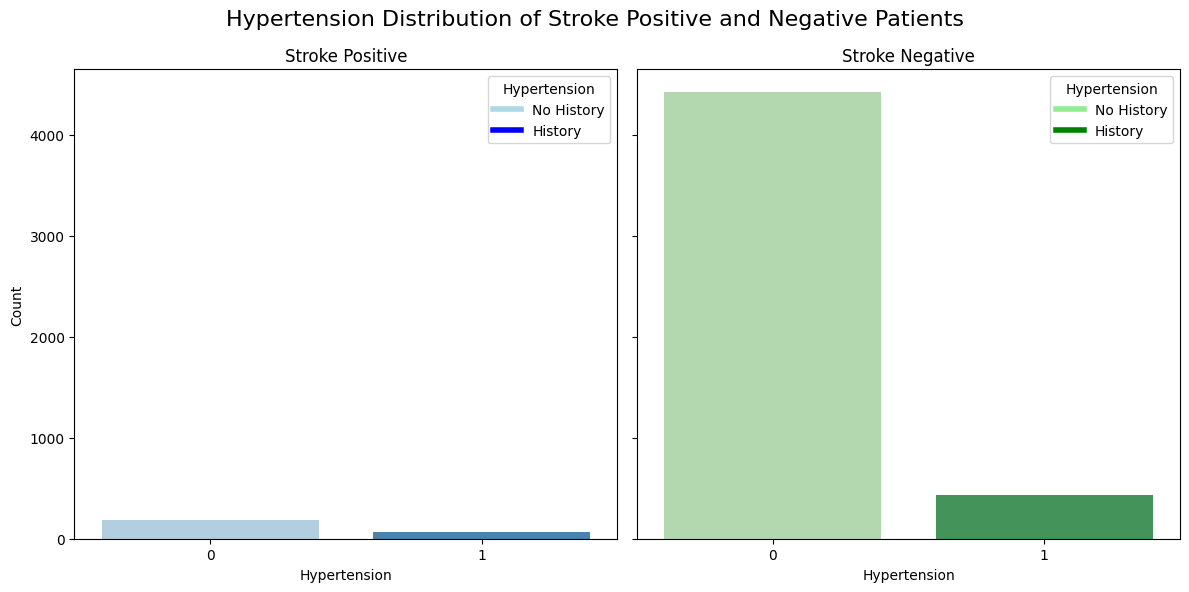

In [212]:
# Hypertension
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting Hypertension Distribution for Stroke Positive patients
sns.countplot(x='hypertension', hue='hypertension', palette="Blues", data=stroke_positive, ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')

# Create a custom legend for the Stroke Positive plot
handles_positive = [plt.Line2D([0], [0], color="lightblue", lw=4),
                    plt.Line2D([0], [0], color="blue", lw=4)]
axes[0].legend(handles_positive, ['No History', 'History'], title='Hypertension')

# Plotting Hypertension Distribution for Stroke Negative patients
sns.countplot(x='hypertension', hue='hypertension', palette="Greens", data=stroke_negative, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel('Hypertension')

# Create a custom legend for the Stroke Negative plot
handles_negative = [plt.Line2D([0], [0], color="lightgreen", lw=4),
                    plt.Line2D([0], [0], color="green", lw=4)]
axes[1].legend(handles_negative, ['No History', 'History'], title='Hypertension')

# Set the main title
plt.suptitle("Hypertension Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


- Percentage of missing values

In [213]:
print("Percentage of missing values in hypertension: ", (data['hypertension'].isnull().sum() / len(data)) * 100)

Percentage of missing values in hypertension:  0.0


- Min/Max

In [214]:
print("Min/Max hypertension of stroke positive patients: ", stroke_positive['hypertension'].min(), stroke_positive['hypertension'].max())

Min/Max hypertension of stroke positive patients:  0 1


&rarr; In both stroke-positive and stroke-negative populations, **hypertension is not overwhelmingly present**. Most patients, regardless of stroke status, do not have a history of hypertension. However, it is important to note that patients with a history of hypertension are more common in the stroke-negative group

&rarr; Hypertension does not appear to be the sole or dominant factor contributing to stroke

<h3>Categorical columns exploration</h3>

<h4>Gender</h4>

- Distribution of values

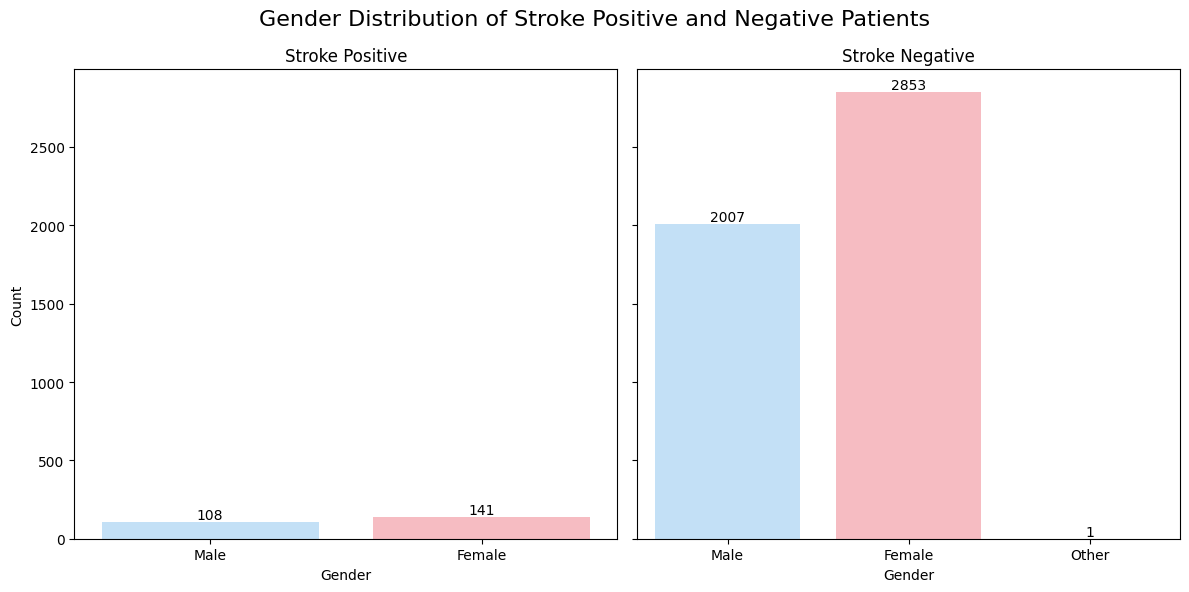

In [215]:
pastel_colors = ['#bae1ff', '#ffb3ba', '#baffc9']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.countplot(x='gender', hue='gender', data=stroke_positive, palette=pastel_colors[:2], ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='gender', hue='gender', data=stroke_negative, palette=pastel_colors, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Gender Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()
plt.show()

- Percentage of missing values

In [216]:
print("Percentage of missing values in gender: ", (data['gender'].isnull().sum() / len(data)) * 100)

Percentage of missing values in gender:  0.0


- Different values

In [217]:
print("Number of different gender: ", len(data['gender'].unique()))
print("Different genders: ", data['gender'].unique())

Number of different gender:  3
Different genders:  ['Male' 'Female' 'Other']


- <b>Abnormal</b>: 'Other' gender has only one record, which can be the outliner element. We can remove it from the dataset without causing any problem.

&rarr; <b>Gender seems not to be a risk factor</b>: The visual data reveals that the male-to-female ratio in the stroke-positive plot closely mirrors that of the stroke-negative plot.

<h4>Ever Married</h4>

- Distribution of values

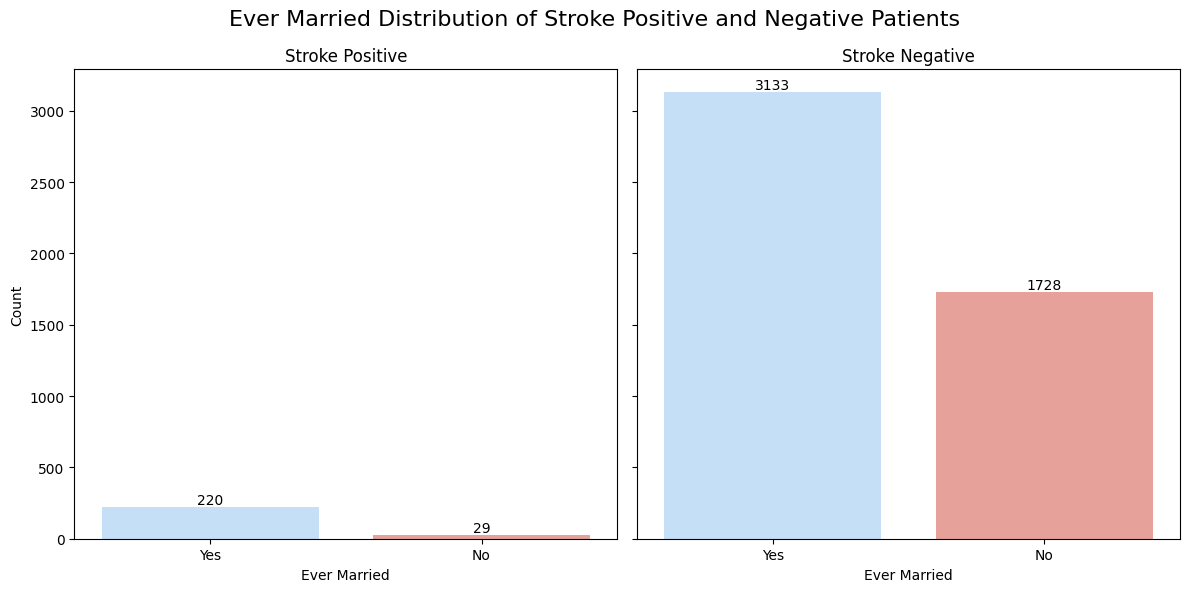

In [218]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.countplot(x='ever_married', hue='ever_married', data=stroke_positive, palette=['#bde0fe', '#f4978e'], ax=axes[0], legend=False, order=['Yes', 'No'])
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Ever Married")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='ever_married', hue='ever_married', data=stroke_negative, palette=['#f4978e', '#bde0fe'], ax=axes[1], legend=False, order=['Yes', 'No'])
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Ever Married") 
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Ever Married Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()
plt.show()

- Percentage of missing values

In [219]:
print("Percentage of missing values in ever_married: ", (data['ever_married'].isnull().sum() / len(data)) * 100)

Percentage of missing values in ever_married:  0.0


- Different values

In [220]:
print("Number of different ever_married: ", len(data['ever_married'].unique()))
print("Different ever_married: ", data['ever_married'].unique())

Number of different ever_married:  2
Different ever_married:  ['Yes' 'No']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>"Ever Married" could be a risk factor</b>: The visual data indicates that the likelihood of stroke is significantly higher among married individuals compared to those who are unmarried.

<h4>Work Type</h4>

- Distribution of values

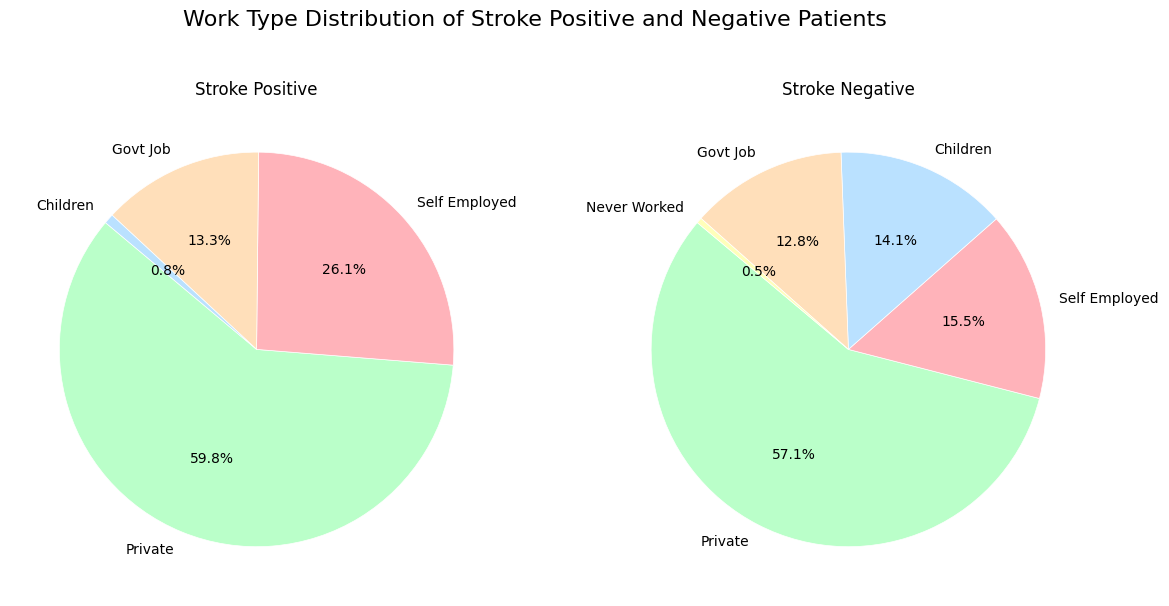

In [221]:
stroke_positive_counts = stroke_positive['work_type'].value_counts(normalize=True) * 100
stroke_negative_counts = stroke_negative['work_type'].value_counts(normalize=True) * 100

pos_labels = ['Private', 'Self Employed', 'Govt Job', 'Children']
neg_labels = ['Private', 'Self Employed', 'Children', 'Govt Job', 'Never Worked']


colors = {
    'Children': '#bae1ff',
    'Govt Job': '#ffdfba',
    'Never Worked': '#ffffba',
    'Private': '#baffc9',
    'Self Employed': '#ffb3ba'
}

pos_colors = [colors[label] for label in pos_labels]
neg_colors = [colors[label] for label in neg_labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(stroke_positive_counts, labels=pos_labels, autopct='%1.1f%%', colors=pos_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[0].set_title("Stroke Positive")

axes[1].pie(stroke_negative_counts, labels=neg_labels, autopct='%1.1f%%', colors=neg_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[1].set_title("Stroke Negative")

plt.suptitle("Work Type Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [222]:
print("Percentage of missing values in work_type: ", (data['work_type'].isnull().sum() / len(data)) * 100)

Percentage of missing values in work_type:  0.0


- Different values

In [223]:
print("Number of different work_type: ", len(data['work_type'].unique()))
print("Different work_type: ", data['work_type'].unique())

Number of different work_type:  5
Different work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Work Type could be a risk factor</b>:
-  <b>Self-employed people have a high rate of having a stroke</b>: The visual data reveals a higher proportion of self-employed individuals in the stroke-positive plot compared to the stroke-negative plot.
-  <b>Children have a very low risk of having a stroke</b>: The visual data shows that children make up a very small proportion in the stroke-positive plot, at less than 1%, whereas in the stroke-negative plot, they account for up to 14.1%.

<h4>Residence Type</h4>

- Distribution of values

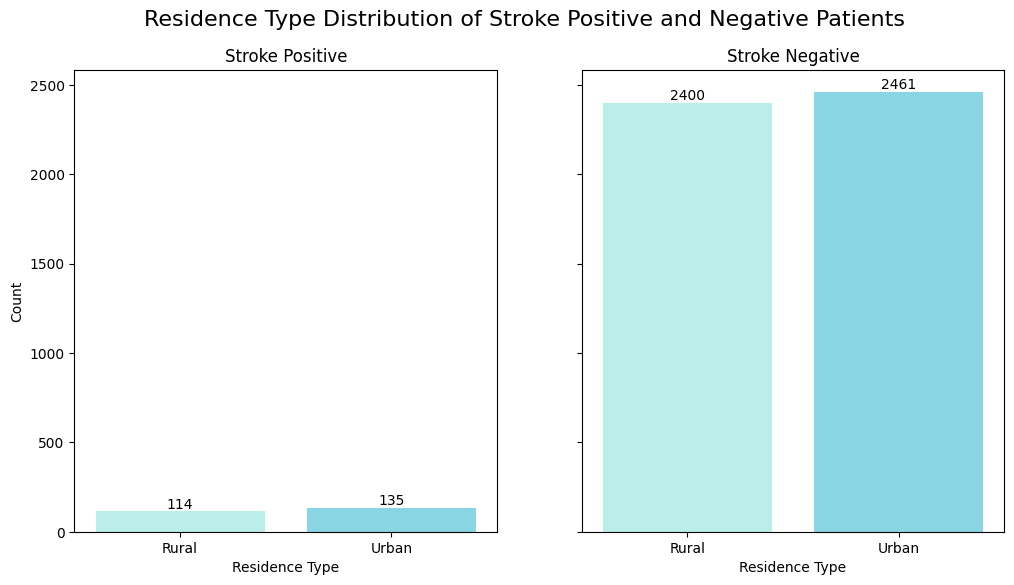

In [224]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.countplot(x='Residence_type', hue='Residence_type', data=stroke_positive, palette=['#7bdff2', '#b2f7ef'], ax=axes[0], legend=False, order=['Rural', 'Urban'])
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Residence Type")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='Residence_type', hue='Residence_type', data=stroke_negative, palette=['#b2f7ef', '#7bdff2'], ax=axes[1], legend=False, order=['Rural', 'Urban'])
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Residence Type") 
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Residence Type Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [225]:
print("Percentage of missing values in Residence_type: ", (data['Residence_type'].isnull().sum() / len(data)) * 100)

Percentage of missing values in Residence_type:  0.0


- Different values

In [226]:
print("Number of different Residence_type: ", len(data['Residence_type'].unique()))
print("Different Residence_type: ", data['Residence_type'].unique())

Number of different Residence_type:  2
Different Residence_type:  ['Urban' 'Rural']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Residence Type seems not to be a risk factor</b>: The rate of stroke among people living in urban areas is strikingly similar to that of those living in rural areas.

<h4>Smoking Status</h4>

- Distribution of values

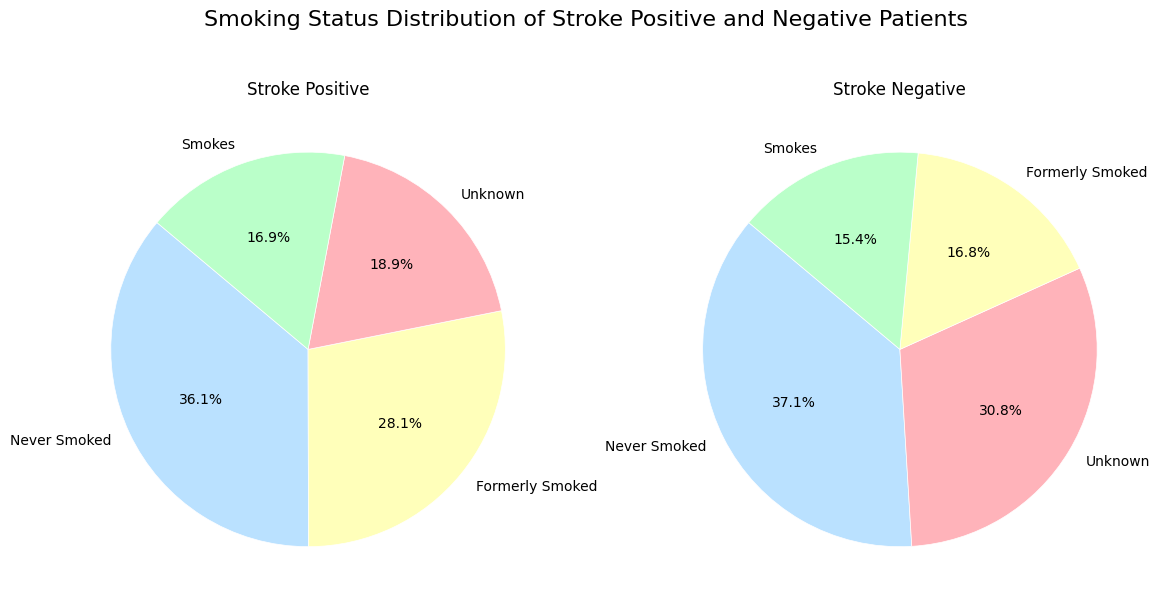

In [227]:
stroke_positive_counts = stroke_positive['smoking_status'].value_counts(normalize=True) * 100
stroke_negative_counts = stroke_negative['smoking_status'].value_counts(normalize=True) * 100

pos_labels = ['Never Smoked', 'Formerly Smoked', 'Unknown', 'Smokes']
neg_labels = ['Never Smoked', 'Unknown', 'Formerly Smoked', 'Smokes']

colors = {
    'Never Smoked': '#bae1ff',
    'Formerly Smoked': '#ffffba',
    'Smokes': '#baffc9',
    'Unknown': '#ffb3ba'
}

pos_colors = [colors[label] for label in pos_labels]
neg_colors = [colors[label] for label in neg_labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(stroke_positive_counts, labels=pos_labels, autopct='%1.1f%%', colors=pos_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[0].set_title("Stroke Positive")

axes[1].pie(stroke_negative_counts, labels=neg_labels, autopct='%1.1f%%', colors=neg_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[1].set_title("Stroke Negative")

plt.suptitle("Smoking Status Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [228]:
print("Percentage of missing values in smoking_status: ", (data['smoking_status'].isnull().sum() / len(data)) * 100)

Percentage of missing values in smoking_status:  0.0


- Different values

In [229]:
print("Number of different smoking_status: ", len(data['smoking_status'].unique()))
print("Different smoking_status: ", data['smoking_status'].unique())

Number of different smoking_status:  4
Different smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Smoking status could be a risk factor:</b>
- <b>Individuals who have a history of smoking or are currently smokers face a greater risk of experiencing a stroke</b>: The proportion of individuals who have smoked or are current smokers is greater in the stroke-positive plot compared to the stroke-negative plot.
- <b>Non-smokers have a lower incidence of stroke</b>: The proportion of non-smokers in the stroke-positive plot is lower than that in the stroke-negative plot.

### NUMERICAL COLUMNS EXPLORATION

###   Handle missing data

In [230]:
#List out numerical columns
numerical = ['age', 'avg_glucose_level', 'bmi']
data[numerical]

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,NaN
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


In [231]:
#For each categorical column, what are the missing value:
data[numerical].isna().sum()


age                    0
avg_glucose_level      0
bmi                  201
dtype: int64

In [232]:
#What is the percentage of missing value
for col in numerical:
    missing_rate = (data[col].isna().sum() / len(data[col]))*100
    print( f'{col}: {missing_rate}%')

age: 0.0%
avg_glucose_level: 0.0%
bmi: 3.9334637964774952%


+ Since the ammount of missing value is small, we can use fill in technique

In [233]:
#Fill in missing value with mean 
imputer = SimpleImputer(strategy='mean')
data[['bmi']] = imputer.fit_transform(data[['bmi']])

#Result 
data['bmi'].isnull().sum()

0

&rarr; No more missing value

In [234]:
type(data['age'])

pandas.core.series.Series

+ Helper Function

In [235]:
def histogram_plot(data = [], title = '', xlabel = '', ylabel = '', color = '', mean_line = False, median_line = False, bins = 30):
    plt.figure(figsize=(8,8))
    sns.histplot(data, bins=bins, color=color)
    plt.xticks(bins)

    if mean_line:
        mean_val = data.mean()
        plt.axvline(mean_val, color='blue', linestyle='-', linewidth=1.5, label=f"Mean: {mean_val:.1f}")
    if median_line:
        median_val = data.median()
        plt.axvline(median_val, color='red', linestyle='-', linewidth=1.5, label=f"Median: {median_val:.1f}")

    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight = 'bold')
    plt.legend()
    plt.show()

def density_plot(data: pd.DataFrame, col1: str = '', col2: str = '', label1: str = '', label2: str = '', title: str = '', xlabel: str = '', ylabel: str = '', bins: int = 30):
    
    plt.figure(figsize=(8, 8))
    
    plt.hist(data[data[col2] == 1][col1], color='red', bins=bins, label=label1, alpha=0.7, density=True)
    
    plt.hist(data[data[col2] == 0][col1], color='blue', bins=bins, label=label2, alpha=0.7, density=True)
    
    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.legend()
    plt.show()


#### AGE AND HOW IT'S AFFECT STROKE

+ Descriptive Statistic

In [236]:
age_mean = data['age'].mean()
age_median = data['age'].median()
age_min = data['age'].min()
age_max = data['age'].max()
age_std = data['age'].std()

print(f"Mean age: {age_mean}")
print(f"Median age: {age_median}")
print(f"Min age: {age_min}")
print(f"Max age: {age_max}")
print(f"Standard deviation of age: {age_std}")

Mean age: 43.226614481409
Median age: 45.0
Min age: 0.08
Max age: 82.0
Standard deviation of age: 22.61264672311349


+ The ages are totally fine, no negative or missing value
+ No age that's exceed human level<br>
&rarr; Not abnormal

+ Age distribution

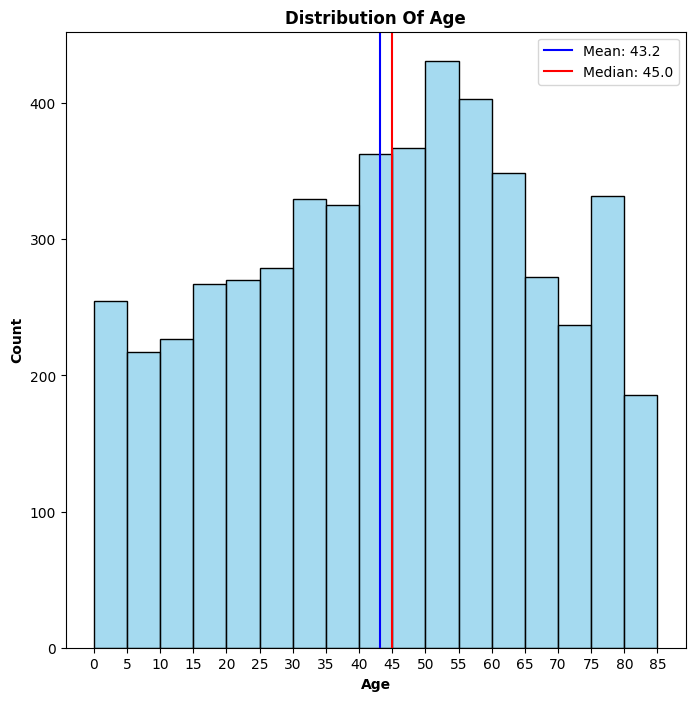

In [237]:
histogram_plot(data['age'], title='Distribution Of Age', xlabel='Age', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(age_min), int(age_max + 5),5))

&rarr; The distribution of ages are relatively even

+ Probability Density

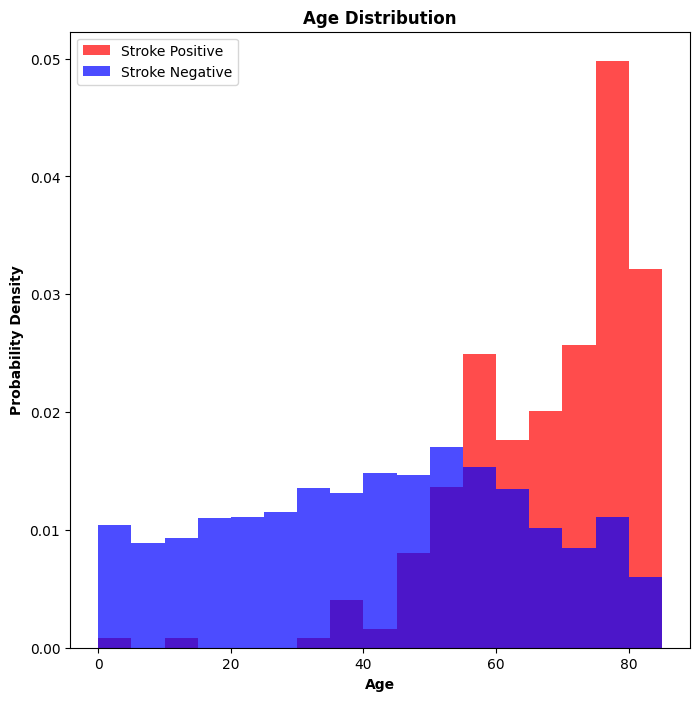

In [238]:
density_plot(data, col1='age', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title = 'Age Distribution', xlabel='Age', ylabel='Probability Density', bins=range(int(age_min), int(age_max + 5),5))

&rarr; We clearly see that the more age, the more likely to get stroke. <br>
&rarr; This piece of information is important for predicting stroke

#### AVERAGE GLUCOSE LEVEL ANALYSIS

+ Did you know : Chemical formula for Glucose is C6H12O6

In [239]:
glu_mean = data['avg_glucose_level'].mean()
glu_median = data['avg_glucose_level'].median()
glu_min = data['avg_glucose_level'].min()
glu_max = data['avg_glucose_level'].max()
glu_std = data['avg_glucose_level'].std()

print(f"Mean glucose level: {glu_mean}")
print(f"Median glucose level: {glu_median}")
print(f"Min glucose level: {glu_min}")
print(f"Max glucose level: {glu_max}")
print(f"Standard deviation of glucose level: {glu_std}")

Mean glucose level: 106.1476771037182
Median glucose level: 91.88499999999999
Min glucose level: 55.12
Max glucose level: 271.74
Standard deviation of glucose level: 45.28356015058198


+ No negative or missing value detected<br>
&rarr; Not Abnormal

+ Glucose level distribution

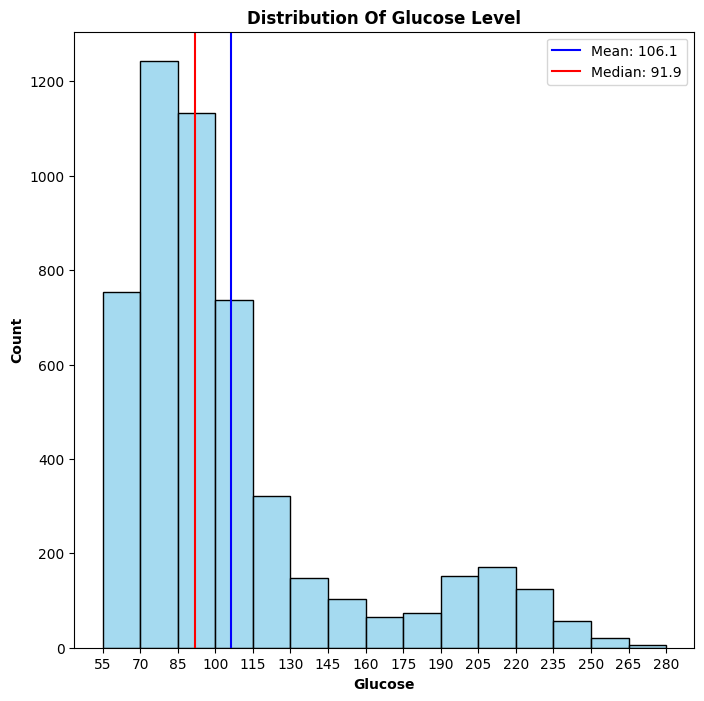

In [240]:
histogram_plot(data['avg_glucose_level'], title='Distribution Of Glucose Level', xlabel='Glucose', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(glu_min), int(glu_max + 15),15))

&rarr; The distribution of glucose level is skewed in positive direction, with most value come from the range of 55 to 115

+ Probability Density

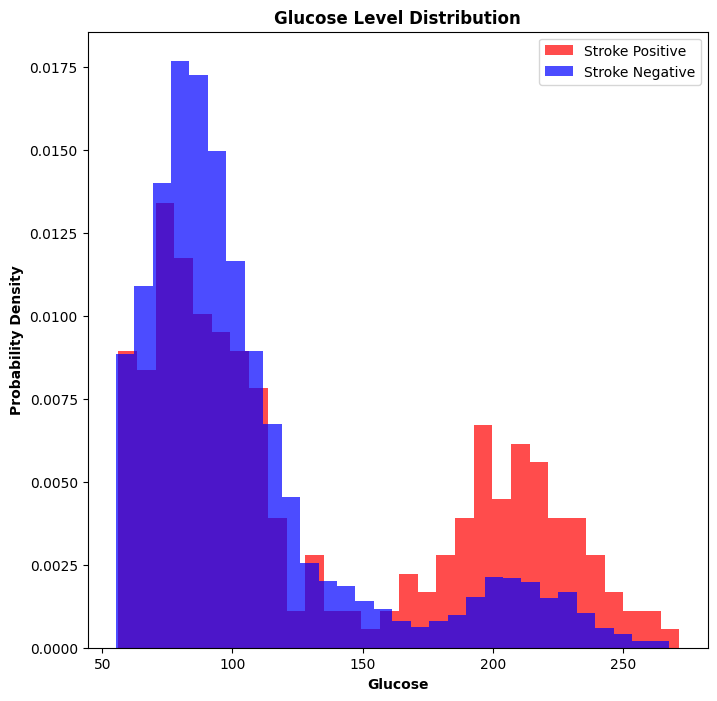

In [241]:
density_plot(data, col1='avg_glucose_level', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title = 'Glucose Level Distribution', xlabel='Glucose', ylabel='Probability Density', bins=30)

&rarr; Something happen when we follow the Glucose level as it raise from 150 to 250. We notice that stroke posibility is significantly more than no stroke

#### BMI EXPLORATION

+ Descriptive Statistic

In [242]:
bmi_mean = data['bmi'].mean()
bmi_median = data['bmi'].median()
bmi_min = data['bmi'].min()
bmi_max = data['bmi'].max()
bmi_std = data['bmi'].std()

# Print the results
print(f"Mean BMI: {bmi_mean}")
print(f"Median BMI: {bmi_median}")
print(f"Min BMI: {bmi_min}")
print(f"Max BMI: {bmi_max}")
print(f"Standard deviation of BMI: {bmi_std}")

Mean BMI: 28.893236911794663
Median BMI: 28.4
Min BMI: 10.3
Max BMI: 97.6
Standard deviation of BMI: 7.698017826857082


+ No negative value, missing value already handled<br>
&rarr; Not Abnormal

+ Value Distribution

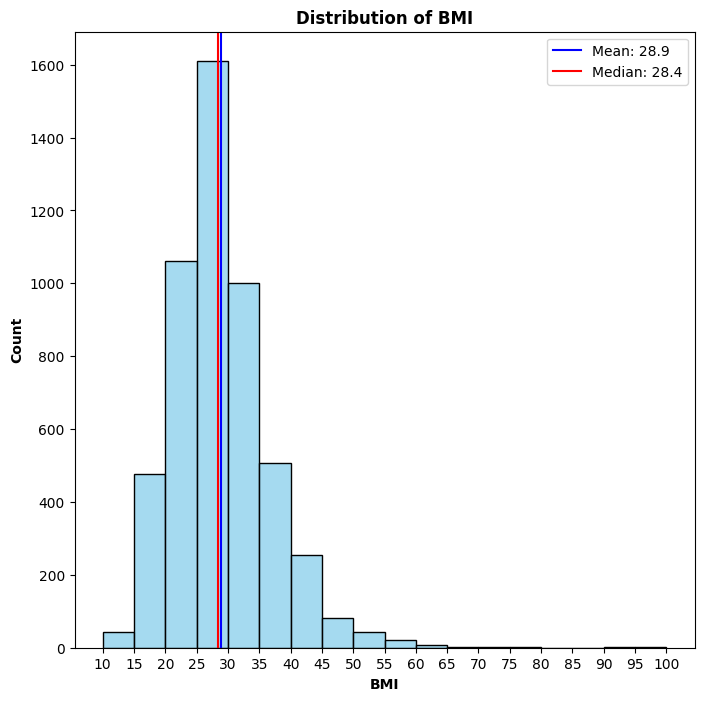

In [243]:
histogram_plot(data['bmi'], title='Distribution of BMI', xlabel='BMI', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(bmi_min), int(bmi_max + 5), 5))


&rarr; The BMI distribution is skewd in positive direction with mose value come from the range of 15 to 45. However, there are some outliers at the range of 90-100, those may cause noise

+ Probability Density

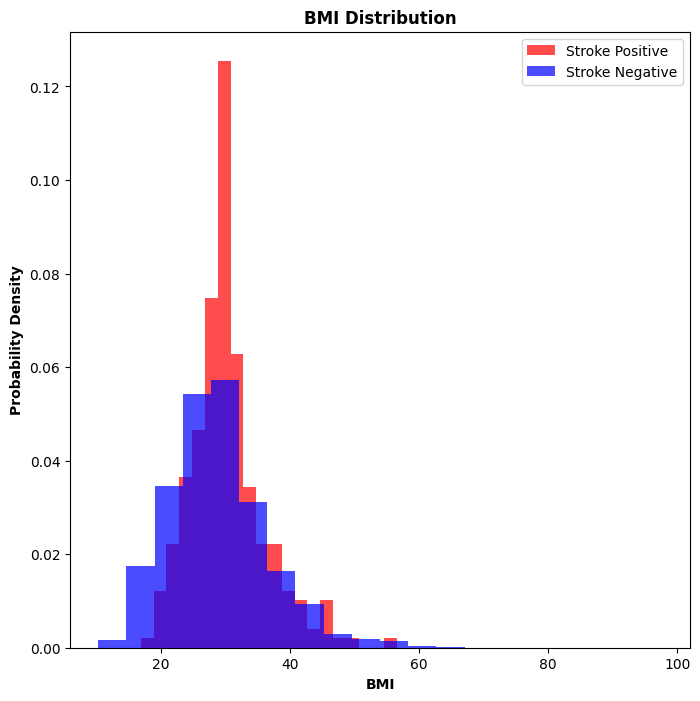

In [244]:
density_plot(data, col1='bmi', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title='BMI Distribution', xlabel='BMI', ylabel='Probability Density', bins=20)


&rarr; Both Stoke Positive and Negative have the BMI value distributed evenly, the probability get very high at the range 20-40, especially for Stroke Positive

<div id = "preprocessing"><h2>3. Preprocessing data </h2></div>

In [245]:
# Drop id column
# data = data.drop('id', axis=1)
# Encoding categorical data
# data['gender'] = data['gender'].replace({'Male':0, 'Female':1, 'Other':2})
# data['ever_married'] = data['ever_married'].replace({'No':0, 'Yes':1})
# data['work_type'] = data['work_type'].replace({'children':0, 'Never_worked':1, 'Govt_job':2, 'Private':3, 'Self-employed':4})
# data['Residence_type'] = data['Residence_type'].replace({'Rural':0, 'Urban':1})
# data['smoking_status'] = data['smoking_status'].replace({'Unknown':0, 'never smoked':1, 'formerly smoked':2, 'smokes':3})

gender_dict = {'Male' : 0, 'Female' : 1, 'Other' : 2}
married_dict = {'No' : 0, 'Yes' : 1}
work_type_dict = {'children' : 0, 'Never_worked' : 1, 'Govt_job' : 2, 'Private' : 3, 'Self-employed':4}
residence_type_dict = {'Rural' : 0, 'Urban' : 1}
smoking_dict = {'Unknown' : 0, 'never smoked' : 1, 'formerly smoked' : 2, 'smokes' : 3}

def category_encoder(label, value_dict):
    if label in value_dict:
        return value_dict[label]
    else:
        return -1

data['gender'] = data['gender'].apply(category_encoder, args=(gender_dict,))
data['ever_married'] = data['ever_married'].apply(category_encoder, args=(married_dict,))
data['work_type'] = data['work_type'].apply(category_encoder, args=(work_type_dict,))
data['Residence_type'] = data['Residence_type'].apply(category_encoder, args=(residence_type_dict,))
data['smoking_status'] = data['smoking_status'].apply(category_encoder,args=(smoking_dict,))

In [246]:
# Check correlation between numerical features
corr = data.corr()
sns.heatmap(corr, annot=True);

<div id = "questions"> <h2> 4. Questions </h2> </div>

<div id = "question-1"> <h3>4.1. Question 1 </h3></div>

<div id = "question-2"> <h3>4.2. Question 2 </h3></div>

<div id = "question-3"> <h3>4.3. Question 3 </h3></div>

<div id = "conclusion"> <h2> 5. Conclusion </h2> </div>

<div id = "difficulties"> <h3>5.1. Difficulties during the project </h3></div>

<div id = "useful"> <h3>5.2. Useful things learned</h3></div>

<div id = "plans"> <h3>5.3. Plans to improve if have more time</h3></div>

<div id = "references"> <h2>6. References</h2></div>